<a href="https://colab.research.google.com/github/rmpbastos/data_science/blob/master/Analyzing_violence_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Crime in Rio" width="80%" src="https://github.com/rmpbastos/data_science/blob/master/img/crime_stux_on_pixabay.png?raw=true"></center>


# **Violence in Rio de Janeiro**
### Analyzing violence data of one of the world's most beautiful places using Pandas
---

Rio de Janeiro is the capital of the state that bears the same name and is the second-most populous city in Brazil, with over 12 million citizens living in its metropolitan area, representing about 70% of the state's total population.

Rio lies on a strip of Brazil’s Atlantic coast and is well known for the beauty of its beaches, peaks and hills, mostly covered by tropical forests. Moreover, the city is a Brazilian cultural treasure, having a reputation for holding the most fabulous festivities, like the Carnival and the New Year's Eve celebration in the notorious Copacabana beach.

But it is not all good news. Contrasting with the natural beauty of the city and the warmth of its citizens, Rio struggles with a long-standing problem: Violence. The crime rate in the city (and state) of Rio de Janeiro is remarkably high, especially when you compare it with other famous tourist destinations worldwide.

In this article, we are going to analyze some violence numbers in the state of Rio de Janeiro with the aid of **Pandas**, one of the best **Python** libraries for Data Analysis.


  

  

## About the Data

The data utilized here is the official statistics shared by [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html), the state Department of Public Safety, and can be downloaded [here](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

Our dataset was built based on events reported on occurrence records in the Civil Police stations of the state of Rio de Janeiro, in addition to complementary information from the state's Military Police.

The information is displayed by month and covers about 29 years, from January 1991 to August 2019.

### Importing the csv file


In [32]:
import pandas as pd

URL_PATH = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv'
df = pd.read_csv(URL_PATH)

## Data Analysis

First, let's understand our dataset, searching for the following elements:

* The size of the data frame
* The columns in the dataset
* The variable types
* Display the first 5 entries
* Identify the missing values

The dataset size:

In [33]:
print('Entries: ', df.shape[0])
print('Features: ', df.shape[1])

Entries:  344
Features:  56


Notice that our dataset consists of 344 rows and 56 columns.

Now let's check our columns:

In [34]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

To better understand the data, it is important to check the types of the variables we are working on:

In [35]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Observe that all variables are numerical, of both types `int` and `float`.

Let's take a glance at the first rows of the dataset:

In [36]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


With a brief analysis of the first 5 entries, we can notice that there are some missing values. Let's check the percentage of missing data for each feature:

In [37]:
# percentage of missing values
missing = ((df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False))
missing

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


It is evident that we are working with a large number of missing values here. Take for instance the information about bike theft (`roubo_bicicleta`, `furto_bicicleta`) and drug-related crimes (`apreensao_drogas_sem_autor`, `posse_drogas`, `trafico_drogas`). More than half of the entries for these felonies are missing.

There are several reasons why this could happen. To this day, many organizations in Brazil still struggle to record data properly. It is possible that some types of crime were not being accurately registered 30 years ago.

For this article, the features we will use are complete, so there is no need to worry about the missing values.

### Dealing with the variables

We are going to create a new data frame containing only the essential variables as well as rename those variables for a better understanding. But first, let's merge the columns `vano` (year) and `mes` (month) to create a unique date column and let's convert it to `datetime`.

In [38]:
# merge year and month into one column and convert it to 'datetime'
df['data'] = df['mes'].astype(str) + '/' + df['vano'].astype(str)
df['data'] = pd.to_datetime(df['data'], format='%m/%Y')
df['data'] = df['data'].dt.to_period('M')

Now let's create a new data frame called `df_crime`, containing the features for our analysis, and rename the columns.

In [39]:
# extract essential features from 'df' into 'df_crime'
df_crime = df[['data', 'roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos', 'hom_doloso', 'roubo_em_coletivo']]

#rename columns
df_crime = df_crime.rename({'data': 'date', 'roubo_veiculo': 'violent_car_theft', 'furto_veiculos': 'nonviolent_car_theft', 'recuperacao_veiculos': 'vehicle_recovery', 'hom_doloso': 'murder', 'roubo_em_coletivo': 'publ_transport_theft'}, axis=1)

In [40]:
# check the new data frame
df_crime.head()

,date,violent_car_theft,nonviolent_car_theft,vehicle_recovery,murder,publ_transport_theft
0,1991-01,1174,2009,872,657,381
1,1991-02,1097,1850,751,732,432
2,1991-03,1265,2084,789,713,422
3,1991-04,1415,2085,787,634,354
4,1991-05,1449,2185,845,650,335


Our data frame is ready! Please find below a description of our variables:

  **Variables library**
  
  * `date` - Year and month of the records
  * `violent_car_theft` - Violent vehicle theft by the use of force or intimidation
  * `nonviolent_car_theft` - Non-violent vehicle theft 
  * `vehicle_recovery` - Number of recovered stolen vehicles
  * `murder` - Willful homicide
  * `publ_transport_theft` - Public transport robbery

## Statistical Analysis

Let's get some statistical insights from our dataset using the method `describe`.

In [41]:
# basic statistical details
df_crime.describe()

,violent_car_theft,nonviolent_car_theft,vehicle_recovery,murder,publ_transport_theft
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2448.697674,1674.671512,1772.238372,504.555233,659.002907
std,789.689559,294.852020,656.761843,113.774481,297.622342
min,1097.000000,1159.000000,729.000000,272.000000,281.000000
25%,1889.750000,1430.500000,1276.750000,413.750000,430.750000
50%,2322.000000,1637.500000,1755.000000,507.000000,592.000000
75%,2778.000000,1833.250000,2202.000000,577.250000,784.000000
max,5358.000000,2630.000000,3695.000000,831.000000,1628.000000


### Property crimes - Vehicle theft

Focusing on the vehicle theft category, let's get the mean values for `violent_car_theft`, `nonviolent_car_theft`, and `vehicle_recovery`.

In [42]:
# mean value for violent vehicle theft
mean_violent_car_theft = df_crime['violent_car_theft'].mean()
print(round(mean_violent_car_theft, 2))

2448.7


In [43]:
# mean value for non-violent vehicle theft
mean_nonviolent_car_theft = df_crime['nonviolent_car_theft'].mean()
print(round(mean_nonviolent_car_theft, 2))

1674.67


In [44]:
# mean value for vehicle recoveries
mean_vehicle_recovery = df_crime['vehicle_recovery'].mean()
print(round(mean_vehicle_recovery, 2))

1772.24


Now, let's determine the percentage of stolen vehicles that were later recovered:

  * $\frac{\text{vehicles recovered}}{\text{violent vehicle theft} + \text{non-violent vehicle theft}}$

In [45]:
# mean value for vehicle recoveries
mean_vehicle_recovery

# mean value for all vehicle thefts
mean_total_thefts = mean_violent_car_theft + mean_nonviolent_car_theft
print('Mean of monthly stolen vehicles: {:.2f}'.format(mean_total_thefts))
print('Mean of monthly recovered vehicles: {:.2f}'.format(mean_vehicle_recovery))

# percentage of recovered vehicles
recovery_rate = mean_vehicle_recovery / mean_total_thefts
print("Rate of recovered vehicles: {:.2%}".format(recovery_rate))


Mean of monthly stolen vehicles: 4123.37
Mean of monthly recovered vehicles: 1772.24
Rate of recovered vehicles: 42.98%


Notice that less than half the number of stolen vehicles are recovered.

Let's display a comparison between violent car theft and non-violent car theft:

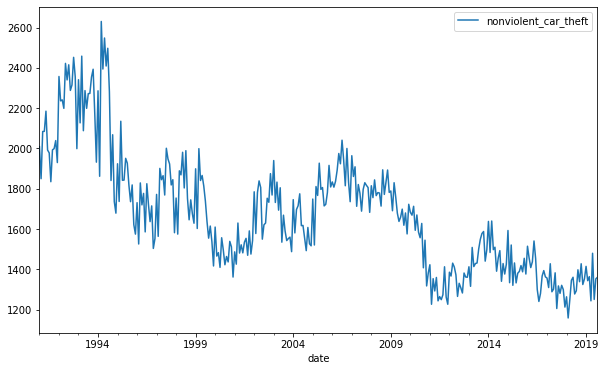

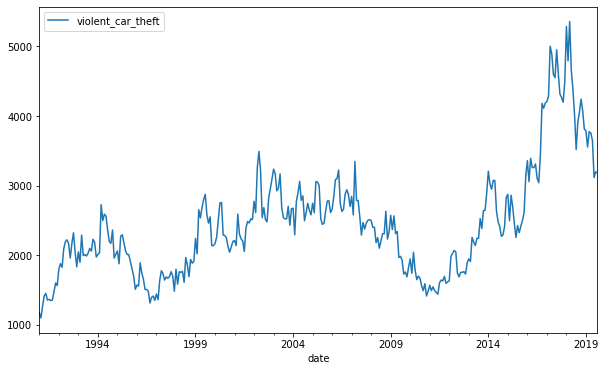

In [57]:
df_crime.plot(x='date', y='nonviolent_car_theft', figsize=(10, 6));
df_crime.plot(x='date', y='violent_car_theft', figsize=(10, 6));

Unfortunately, according to the charts above, vehicle thefts became more violent over the years.

In 1991 there were over 1,000 monthly violent vehicle thefts, while the non-violent occurrences were at about 2,000 per month. Later, after some ups and downs, violent reports surged, reaching an apex of over 5,000 monthly occurrences in 2018, dropping to about 3,000 in 2019. The non-violent occurrences presented a downward trend over the years, hitting a low point of about 1,200 in 2018.

### Personal Crimes - Homicide

Now let's focus on personal crimes, more specifically, homicides.
In the following lines we are displaying the minimum and the maximum number of murders per month:

In [47]:
# min and max value for murder
print('The lowest number of murders was: {}'.format(df_crime['murder'].min()))
print('The highest number of murders was: {}\n'.format(df_crime['murder'].max()))

The lowest number of murders was: 272
The highest number of murders was: 831



Let's verify the month with the highest number of murders:

In [59]:
df_crime.loc[df_crime['murder'] == 831]

,date,violent_car_theft,nonviolent_car_theft,vehicle_recovery,murder,publ_transport_theft
48,1995-01,2060,1924,1435,831,377


January of 1995 was the most violent month in our dataset, considering the `murder` variable, with 831 homicides.

To put this number into perspective, it represents more than double that of [Spain's homicide count](https://dataunodc.un.org/) for the whole year of 1995. Bear in mind that in 1995 Spain had about [40 million](https://data.worldbank.org/) inhabitants while the state of Rio de Janeiro had [13.5 million](https://www.ibge.gov.br/en/statistics/social/population/20746-1996-population-count.html?edicao=17261&t=resultados).

### Plotting some graphs

Charts are great when it comes to displaying information in an easy way for our brain to process the content.

Histograms are powerful tools that help us understand the value distribution in our variables. Let's see the histogram of `murder`:


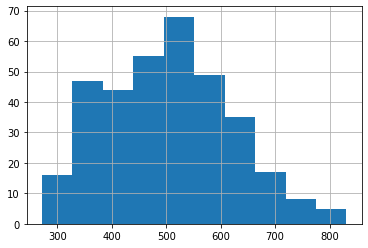

In [60]:
# murder histogram
df_crime.murder.hist();

From the chart above we can get a few insights:
* There were about 70 months with a count of 500-550 homicides during the period.
* In less than 10 months the number of homicides was around 800.
* The histogram is slightly skewed to the right, although the mean and the median have similar values, as seen above when we used the `describe` method.

Now let's plot a line graph showing the homicide numbers over the years:

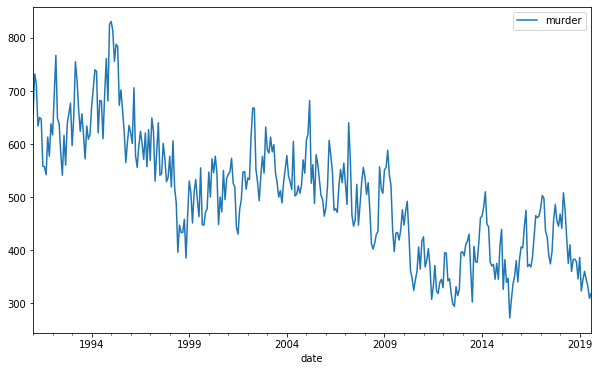

In [61]:
df_crime.plot(x='date', y='murder', figsize=(10, 6));

The line chart above is useful to extract some pieces of information as well:
* Despite showing erratic behavior, the negative trend of the chart is clear.
* We can notice the peak of over 800 homicides in 1995, as well as the lowest point of about 250 occurrences in 2015.

Finally, let's see how violence in the public transport system behaved from 1991 to 2019:

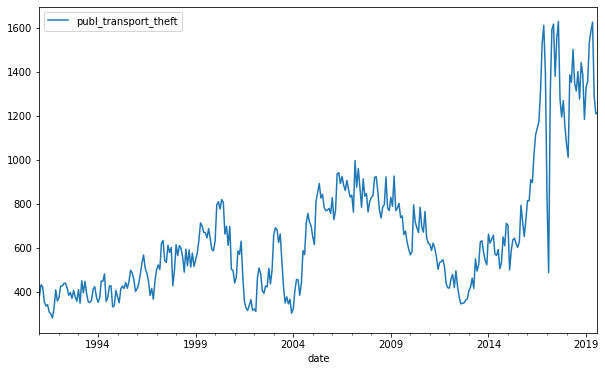

In [62]:
df_crime.plot(x='date', y='publ_transport_theft', figsize=(10, 6));

A few observations over the chart above:
* The number of occurrences in public transport grew exponentially in the period, reaching 1,600 between 2018 and 2019, about 4 times higher than the 400 in 1991.
* The episodes of violence had some ups and downs until 2013 when it started a sharp increase reaching the highest numbers for the whole period.

## Conclusion

We have made a brief analysis of some violent features of Rio de Janeiro. It is well known for those familiar with the city and state of Rio de Janeiro that violence is a tragic part of its citizen's lives.
Further analyses can be made, utilizing more advanced tools, to identify deeper aspects of the violence in Rio and other cities in the world.

As for the facts extracted from our dataset, we could notice that vehicle theft has become more violent over the past few decades, as well as thefts occurred inside the public transport system. The later saw an increase of about 4 times in 29 years. This is unpleasant both for citizens and tourists.

However, we found some good news related to the homicide rate. The number of murders showed a downward trend over the past 3 decades. In 2019 the number of homicides was about half that of 29 years earlier.